In [1]:
# !pip2 install pypolyagamma

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import importlib
import os
import sys

from base.experiment import *
from logistic.env_logistic import *
from logistic.agent_logistic import *
from utils import *

import numpy as np
import pandas as pd
import plotnine as gg

#import importlib
#importlib.reload(logistic.agent_logistic)
#reload(sys.modules['logistic.agent_logistic'])

In [2]:
#No bias for now.

def simple_compare(agents, num_articles, dim, var, n_steps, seed=0, verbosity=0):
    env = LogisticBandit(num_articles, dim, NormalDist(0,1,dim=dim), NormalDist(0,var,dim=dim), seed=seed)
    #DistributionWithConstant(
    experiment = ExperimentCompare(agents, env, n_steps,
                   seed=seed, verbosity=verbosity) #, rec_freq=1, unique_id='NULL')
    experiment.run_experiment()
    results = []
    results.append(experiment.results)
    df = pd.DataFrame(results[0])
    #https://stackoverflow.com/questions/39092067/pandas-dataframe-convert-column-type-to-string-or-categorical
    df['agent_id'] = df.agent_id.astype('category')
    print(gg.ggplot(df)
     + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    print(gg.ggplot(df)
     + gg.aes('t', 'time', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    return results, df

def hyperparameter_sweep(make_agent_from_hyperparameters, hyperparam_list, dim, var, n_steps, seed=0, verbosity=0):
    agents = [make_agent_from_hyperparameters(hyperparam) for hyperparam in hyperparam_list]
    results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=verbosity)

In [3]:
name = 'logistic'
num_articles = 10
dim = 20
var = 1.0/9
theta_mean = 0
theta_std = 1

n_steps = 500 #number of experiment steps
time_limit= 0.1

verbosity=1


In [4]:
make_sagald_agent = lambda hypers: SAGATS(num_articles, dim, [0]*dim, cov=None, 
                                          step_size=lambda t: hypers[0]/(1 + t * np.sqrt(dim*var)/dim),
                                          batch_size = hypers[1],
                                          time=time_limit,
                                          n_steps=9999,
                                          init_pt=None, verbosity=verbosity)

n_steps=100

In [5]:


#hyperparameter_sweep(make_sagald_agent, list_prod([[0.2,0.1,0.05], [32, 64, 128]]), dim, var, n_steps, seed=1, verbosity=1)

#hyperparameter_sweep(make_mala_agent, [[0.1/2**n] for n in range(10)], dim, var, n_steps, seed=1, verbosity=1)

theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521]
Experiment: Step 0
 Sample: array([-1.65072127, -0.89055558, -1.1191154 ,  1.9560789 , -0.3264995 ,
       -1.34267579,  1.11438298, -0.58652394, -1.23685338,  0.87583893,
        0.62336218, -0.43495668,  1.40754   ,  0.12910158,  1.6169496 ,
        0.50274088,  1.55880554,  0.1094027 , -1.2197444 ,  2.44936865])
 Steps taken: 0
 Sample: array([-0.54577417, -0.19883786, -0.7003985 , -0.20339445,  0.24266944,
        0.20183018,  0.66102029,  1.79215821, -0.12046457, -1.23312074,
       -1.18231813, -0.66575452, -1.67419581,  0.82502982, -0.49821356,
       -0.31098498, -0.00189148, -1.39662042, -0.86131636,  0.67471153])
 Steps taken: 0
Experiment: Step 1
 Sample: array([ 0.52254105, -0.46937756, -0.48945685,  0.33465189, -0.44559642,
   

 Sample: array([-1.07484236, -0.27553515, -0.20041497,  0.85575082,  2.50362671,
       -0.25078491,  0.98962964,  0.63385463,  1.60528303,  1.76892171,
        1.85836261, -1.01108494, -0.77798084,  0.29603093, -1.18860702,
       -0.38666115, -0.17323709, -0.88334919, -0.56835817, -0.81614249])
 Steps taken: 1276
Experiment: Step 13
 Sample: array([ 0.44728718,  0.04018867,  0.62274973,  0.49549585,  1.00953495,
       -0.69299705,  1.0921073 , -0.12097841, -0.17068019,  0.55612469,
        0.33097531, -0.59753294, -1.6040089 , -0.78722316, -1.58147571,
        0.18118777, -2.7501898 , -1.06999944, -1.53134412, -0.23239877])
 Steps taken: 1215
 Sample: array([ 1.14605169, -0.69337283,  1.23273489, -0.53725279,  0.24772835,
       -1.8883637 , -0.19476477,  0.22147009, -0.77697122,  0.33744639,
        0.23058645, -0.56267191, -0.35677316, -0.36329502, -0.38201688,
       -0.67072594,  0.37691549,  0.40576825, -0.5516573 ,  1.1874616 ])
 Steps taken: 1251
Experiment: Step 14
 Sample: 

 Sample: array([ 0.45563629, -1.68223063,  0.32341027,  1.14766518,  1.74776939,
       -1.20569968,  0.80996463, -0.44811509, -0.36142895,  0.03600765,
       -0.30730533, -1.03856049, -0.81528053, -1.07092135, -2.26839329,
        0.33281254, -1.92752388, -0.02378853,  0.18986413,  0.37337621])
 Steps taken: 1178
Experiment: Step 26
 Sample: array([-1.32913856, -0.74497448, -0.73258776,  0.90849035,  0.44124479,
       -1.18003835,  1.80132997, -0.5341027 , -0.0291552 ,  0.83038053,
        1.89217928, -1.77160741, -1.76305637,  1.52193219,  2.67411736,
        0.74220161,  1.15464759,  0.09577262, -1.82522823, -0.37850881])
 Steps taken: 1192
 Sample: array([-1.0762537 , -0.11758612, -0.00978282, -0.37507429,  1.05784641,
       -2.40171525,  1.0879408 ,  0.04795875, -1.00294465,  1.11029397,
       -0.4982561 , -0.73236125, -1.10696612, -0.60745215, -1.23585956,
       -0.60806432, -1.03925149, -0.46993029,  0.18649845, -0.15848906])
 Steps taken: 1167
Experiment: Step 27
 Sample: 

 Sample: array([ 0.35218291, -0.18171623,  1.00486302, -1.45933293,  1.45989641,
       -0.21557459,  0.51476601, -0.13343366, -0.75523518,  0.91662093,
        1.34504908, -0.32202093, -0.25166351, -0.41647988, -0.71540962,
        0.12329384, -0.05474348, -1.30902411,  0.89238554, -0.66300389])
 Steps taken: 1098
Experiment: Step 39
 Sample: array([ 0.24792014, -0.34304671, -1.23986333,  0.83077478, -0.43619421,
        2.15054776,  1.55084802, -0.10047226, -1.95771877, -1.47032461,
        0.2478613 , -0.90281104, -1.12554843, -0.83574503, -0.40799122,
        0.3775924 , -1.24781971, -3.47246109,  0.07658604, -0.40385078])
 Steps taken: 1192
 Sample: array([-0.2430989 , -0.38913749,  0.903483  ,  1.20576113,  0.33193547,
       -1.06343565,  1.59263089, -0.63495782,  0.71988444,  1.09632021,
        1.12657572, -2.02977828, -2.33246372,  0.25593023, -0.67675999,
       -1.25206171,  0.20871521, -0.70278934, -0.07673059,  0.66511117])
 Steps taken: 1078
Experiment: Step 40
 Sample: 

 Sample: array([ 0.78457621, -0.93139074,  0.60418585, -1.13046259, -0.16140402,
        0.16872076,  0.78656918,  0.483699  ,  0.6258692 ,  1.77631133,
        0.42462052, -1.03247112, -0.75812417, -0.26778137,  0.46077169,
        0.88241379, -0.70289283, -1.24069613, -0.08738325, -0.18806443])
 Steps taken: 1036
Experiment: Step 52
 Sample: array([-1.62124168, -2.24103858, -0.76515181,  0.1487247 , -0.17933854,
       -0.07741054,  3.01705927,  0.68758333, -0.06046869,  1.10164214,
        2.12762312, -1.49572246,  0.10037413,  0.97017633,  1.51734324,
        3.41885374,  0.45197102, -0.97293954, -1.14628719,  0.25358996])
 Steps taken: 1195
 Sample: array([ 0.74646922, -0.75118896,  0.03265873, -0.36128898,  0.99107956,
       -0.58372906,  0.47590056,  1.0571037 , -0.33295491,  1.98315077,
        1.18940216, -1.45139557, -0.33045775, -0.62216421, -0.49747469,
       -0.42134683, -0.40577704, -0.13328916,  0.3174645 ,  0.19293971])
 Steps taken: 1024
Experiment: Step 53
 Sample: 

 Sample: array([ 0.7383845 ,  0.61195931,  1.11382098, -0.26075674,  0.18066881,
       -2.1195955 , -1.23118055,  0.60890051,  0.37284925,  3.05374469,
        2.10402823, -1.85269071, -1.13329056, -0.06137347, -1.52910993,
       -0.07997478, -0.38105017,  0.18020456,  1.74818389,  0.64676969])
 Steps taken: 960
Experiment: Step 65
 Sample: array([-0.18011838,  0.90934694,  0.11104413,  0.17495788,  1.40259885,
       -0.33197596, -1.03239292, -0.98153071, -1.76615509, -0.51609208,
        2.13570833, -0.55486303, -0.53341565, -0.60611168,  1.58011582,
        0.48518542,  0.60863517, -1.38659702, -1.15053465,  0.31409043])
 Steps taken: 1188
 Sample: array([ 1.19668120e+00, -1.28796781e+00,  1.10407218e+00,  5.23610921e-01,
        5.55980212e-01, -9.34703201e-01, -3.57082607e-01,  7.01731956e-01,
       -5.06645782e-02,  1.68076639e+00,  2.35504257e-01, -3.12428532e+00,
       -2.17759075e-03, -2.50069058e+00, -5.58514533e-01,  1.60415472e+00,
       -2.73144786e-01, -4.61478155e-0

 Sample: array([ 0.80381704, -0.61045978, -1.56549235,  1.06559235,  0.78569738,
       -1.10466118,  0.24516967, -0.86927166,  2.13281465,  0.23059713,
        0.41829274, -0.68103552, -1.28514474, -1.03476892,  0.02295997,
        0.02050232, -1.17683868, -1.44922668,  2.05462984,  1.71675281])
 Steps taken: 880
Experiment: Step 78
 Sample: array([ 1.15261331, -1.25869616, -1.01062507, -1.59104398,  1.18964328,
       -2.54731809, -0.10214808, -1.85466143, -0.03894373, -0.25399141,
        3.51901545, -1.797816  , -1.56703512, -0.02160734, -0.52235598,
       -0.89008018,  1.03743517, -0.85953761,  1.22248243,  0.35480249])
 Steps taken: 1188
 Sample: array([ 1.13537264, -1.01755213,  0.24227389,  0.49675969,  0.21577018,
       -1.1356057 ,  0.78216207,  0.76994694,  1.29627694,  1.73386098,
        0.12651841, -1.78956262, -0.9382533 ,  0.61863941, -0.987691  ,
        0.71635793, -0.24111408, -1.77855708,  0.74390885,  1.60080681])
 Steps taken: 874
Experiment: Step 79
 Sample: ar

 Sample: array([ 0.85090306, -0.37065574, -1.12370201, -0.70374014,  1.13009765,
       -0.92249583,  1.00865372, -0.62506643,  0.38130165,  0.69003972,
        1.13928461, -0.77783106, -1.28551897, -1.41561001, -0.03139413,
        0.19491452, -1.49119301,  0.50690408,  0.87462067,  0.07715902])
 Steps taken: 815
Experiment: Step 91
 Sample: array([-1.14617495, -1.20632793, -2.10505445, -1.52205492, -0.49527024,
       -0.0998546 ,  0.53891436,  2.27900113,  1.08534139, -0.99469691,
        2.72478589, -0.23282029, -1.26614815,  2.18939084,  0.24579784,
       -0.39165374,  0.68416308,  1.86743235, -0.28703118, -0.05697855])
 Steps taken: 1185
 Sample: array([ 0.75887418, -1.36088246,  0.511416  , -0.84685868,  0.84449094,
       -0.69452712,  1.48590414, -0.95195605,  0.54187663,  1.10037311,
        0.59680958, -0.86314   , -0.28407702, -0.41276434,  0.11496693,
       -0.14274602, -1.12406485, -0.4038145 ,  0.86785256, -0.03262683])
 Steps taken: 816
Experiment: Step 92
 Sample: ar

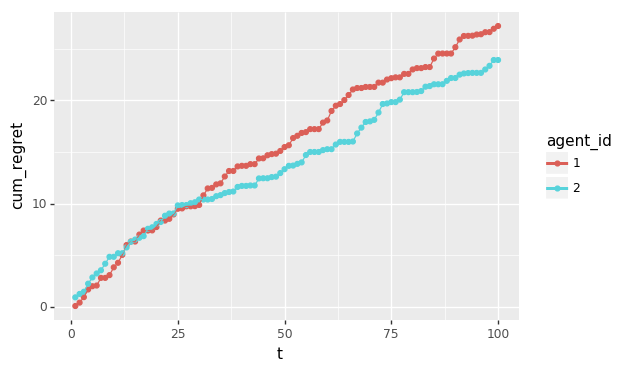

<ggplot: (8783566478501)>


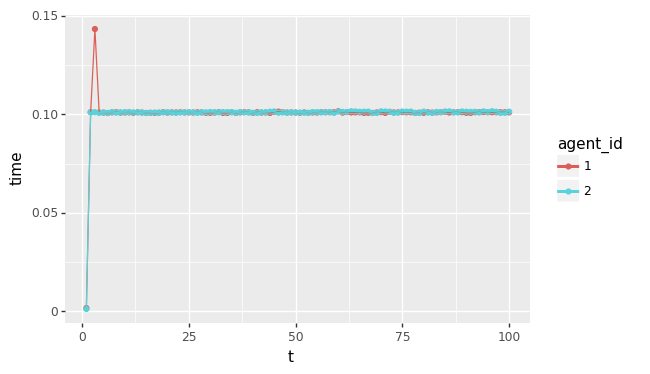

<ggplot: (8783674256145)>


In [6]:

hyperparameter_sweep(make_sagald_agent, list_prod([[0.2], [1,100]]), dim, var, n_steps, seed=1, verbosity=1)

theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521]
Experiment: Step 0
 Sample: array([-1.65072127, -0.89055558, -1.1191154 ,  1.9560789 , -0.3264995 ,
       -1.34267579,  1.11438298, -0.58652394, -1.23685338,  0.87583893,
        0.62336218, -0.43495668,  1.40754   ,  0.12910158,  1.6169496 ,
        0.50274088,  1.55880554,  0.1094027 , -1.2197444 ,  2.44936865])
 Steps taken: 0
 Sample: array([-0.54577417, -0.19883786, -0.7003985 , -0.20339445,  0.24266944,
        0.20183018,  0.66102029,  1.79215821, -0.12046457, -1.23312074,
       -1.18231813, -0.66575452, -1.67419581,  0.82502982, -0.49821356,
       -0.31098498, -0.00189148, -1.39662042, -0.86131636,  0.67471153])
 Steps taken: 0
Experiment: Step 1
 Sample: array([ 0.32237883,  0.06259413, -0.97780432,  1.27928571,  1.17894734,
   

 Sample: array([ 0.25397398, -1.5726179 ,  0.11008578, -0.40955752,  1.35494384,
        1.21819697, -0.7951955 , -1.35589909,  1.37471432, -0.63449141,
        0.18148923,  1.83200642,  0.00865575, -0.49652719, -0.66331126,
       -1.98639343,  0.97757127, -1.36918026, -0.74758009,  1.0131231 ])
 Steps taken: 1204
Experiment: Step 13
 Sample: array([ 0.87139364,  1.32356284, -0.89431714, -3.30565832, -0.29280804,
        0.35925069, -0.88460395,  1.83638163,  1.72739803,  1.75587585,
        0.40056225,  0.817906  , -1.84146279, -1.13183781, -0.3156689 ,
        0.16159993,  0.75377693, -0.97954132, -1.8029433 ,  0.27864213])
 Steps taken: 1148
 Sample: array([ 1.86082722, -1.7440237 ,  0.39430635, -1.35880749, -0.46359863,
        1.53989058,  1.07564449, -0.78998767, -1.76863056,  0.84276519,
       -0.36277138, -2.25844982, -0.26878968, -2.07515116, -0.19819377,
       -0.59526981, -1.6883944 , -0.85362247, -0.42963465, -0.04496212])
 Steps taken: 1190
Experiment: Step 14
 Sample: 

 Sample: array([ 0.72835421,  0.74272092, -1.24267295, -0.39903778,  0.29272769,
       -0.90528331,  0.06294917, -0.42707142, -2.01323349, -0.812393  ,
        1.10959318, -0.9720314 ,  0.62767065, -0.2682184 ,  0.09957904,
       -1.14196159,  1.14916706, -2.47879038,  0.02270811,  0.10365785])
 Steps taken: 1107
Experiment: Step 26
 Sample: array([ 0.76451162,  0.07651503, -1.13523654, -0.82383984,  2.20899934,
        0.52969246,  1.81480189,  0.64431356,  1.67354874, -2.15622758,
        2.08022964, -2.00213834,  0.22559733, -0.08043972, -0.78133326,
       -0.91844463, -1.30898175, -2.84588294, -0.08039776, -1.26752653])
 Steps taken: 1134
 Sample: array([ 0.95850113, -0.77802472, -0.40642894, -1.94145304,  0.30150163,
       -0.6803319 , -0.48115226, -1.230873  , -0.69821253,  0.86823804,
        1.3923727 , -1.30191514, -1.77683562,  0.58132193,  1.44438451,
        0.60610299,  0.94625816, -0.32793251, -0.05962331,  0.03668831])
 Steps taken: 1094
Experiment: Step 27
 Sample: 

 Sample: array([ 1.57557222, -0.26728167,  0.04913158, -0.26179277,  0.57368993,
       -1.39045729,  0.72848783,  0.31846362, -1.23700239, -0.30948462,
        1.98595162, -0.57076249, -2.05194734, -1.85559741,  0.26599822,
        0.28104424,  1.37908505, -0.34983583, -0.13711649,  0.90063872])
 Steps taken: 1041
Experiment: Step 39
 Sample: array([ 0.99284998,  0.85381067, -0.06749047, -0.34050532,  0.86375977,
        1.00643555, -0.91820586,  1.20755413, -0.31139723,  0.21531595,
        2.84532892,  0.41114436, -1.19815488,  0.78657494, -0.3737694 ,
       -0.9103586 ,  0.57513913, -1.47646029,  0.63501219,  0.156403  ])
 Steps taken: 1130
 Sample: array([ 1.70470502, -0.33783685,  0.84853819, -2.03133385,  0.65612878,
       -1.35083783,  0.0854126 , -0.20552268, -0.66294158,  0.8867641 ,
        0.54897144, -0.34776102, -1.41994396, -0.03162481, -1.20554936,
       -0.51490268,  1.07129878,  0.01954584,  1.86690379,  0.32409512])
 Steps taken: 1034
Experiment: Step 40
 Sample: 

 Sample: array([ 2.205596  ,  0.44355584,  0.28004851, -0.53674347, -0.11318403,
       -0.62814316,  0.62871095,  2.53143637, -0.39807872,  0.57875399,
        1.61268374, -1.44887369, -0.27317579, -1.15929742, -1.44733459,
       -1.11680459,  0.93164526, -1.19358962, -0.277366  , -1.08937759])
 Steps taken: 985
Experiment: Step 52
 Sample: array([-0.8639924 ,  0.080989  , -0.29250449, -0.3364975 ,  2.20411629,
       -0.80699658, -0.08749451,  0.28279908,  0.04672919,  2.57040905,
        0.11760084, -0.51979249, -0.49300341,  1.85224622, -0.01821921,
       -1.46269499, -1.68726524, -0.76071252, -1.18031164, -0.67174624])
 Steps taken: 1126
 Sample: array([ 1.04717739, -0.63520858, -0.89645793, -1.10861262,  0.06448885,
       -1.72871692,  1.0941516 ,  3.18274292, -0.62940185, -0.19009957,
        1.93322787, -0.68390634, -1.44417326,  0.16676798, -0.61011107,
        0.2819208 ,  0.06314953,  0.06592762, -0.24540242,  0.87224398])
 Steps taken: 979
Experiment: Step 53
 Sample: ar

 Sample: array([ 2.05202207, -0.49779394, -1.45720131, -1.3338771 ,  0.757159  ,
       -1.06410575, -1.30170877,  2.15232341, -0.29392147,  0.23349914,
        1.24306137, -1.14678659, -1.02380036,  0.34065045, -0.11863096,
        0.14796934,  0.37886068, -1.33312667,  0.01686287,  1.11642156])
 Steps taken: 923
Experiment: Step 65
 Sample: array([ 0.09713883,  0.78001617, -0.43662442,  0.29343417,  2.83763583,
       -1.29198855,  0.18635788,  0.9446882 , -0.10315554,  0.79285124,
        1.60027936, -1.62583487, -1.48233338, -1.30299492,  1.64965044,
       -1.34884432,  0.38212186,  0.1815924 ,  0.63141547,  1.33073941])
 Steps taken: 1124
 Sample: array([ 1.49190872, -0.79196499, -0.08235041, -0.55803892, -0.28024741,
       -1.79531343, -0.12512611,  0.370682  , -0.29562948,  1.00130321,
        0.57433645, -1.00054079, -1.3078768 ,  0.73598756, -0.73476977,
        0.83518447, -0.38182771, -1.26897593,  0.1463914 ,  0.50064873])
 Steps taken: 911
Experiment: Step 66
 Sample: ar

 Sample: array([ 1.85260082, -0.24670688, -0.21621293, -1.16039616, -0.39574497,
       -1.21868634, -0.44075261,  0.58567429, -1.5249625 ,  0.84794837,
        0.3289262 , -2.44556856, -1.6537913 , -2.26493396,  0.32567484,
       -1.09707054, -0.18764584, -0.94242588,  0.45740973, -0.83585313])
 Steps taken: 822
Experiment: Step 78
 Sample: array([ 1.01248862,  1.56097369, -1.93345279, -0.71154021,  0.13289027,
       -0.95603141,  0.67828189,  0.5906567 ,  1.22441891,  0.87239651,
        1.22326439, -0.43207688, -0.95048186,  0.48119115,  3.22353593,
       -1.9060077 ,  0.53796764, -0.07612901,  0.859362  ,  1.63615718])
 Steps taken: 1126
 Sample: array([ 1.9289322 , -0.65807106,  0.21570007, -1.8235774 ,  0.50555983,
       -1.36033874,  0.27206432, -0.13839665, -0.42087817,  1.17114555,
        1.37282037, -0.661983  , -0.5313763 , -0.70362897,  1.08926229,
       -1.60077355, -0.8403639 ,  0.14114628, -0.89433105, -1.62147579])
 Steps taken: 842
Experiment: Step 79
 Sample: ar

 Sample: array([ 2.18617219, -0.06322713, -0.40643399, -1.14910246, -1.15635704,
       -1.72536736, -0.13360172, -0.58815301, -1.4263078 ,  1.97730492,
        1.39467292, -1.434354  , -0.05693053, -0.92165895,  0.01261305,
       -1.08039475,  0.08760998, -0.68061579,  0.94238174,  0.03831949])
 Steps taken: 798
Experiment: Step 91
 Sample: array([ 1.3906227 , -1.90319991, -0.54644469, -1.73690824,  2.13138447,
        0.22435426,  0.06080977,  1.22907009,  0.18023632,  1.05169842,
        1.87013417, -0.98095214, -0.58614813, -0.03843803,  2.64513527,
       -1.06424112, -1.32114497, -0.54373403, -0.97398993, -0.52736259])
 Steps taken: 1121
 Sample: array([ 1.57030018, -0.5146358 , -2.29026803, -0.91307512,  2.13722528,
       -2.05096562, -0.78711088, -0.30498044,  0.28841568,  1.33561433,
        1.27666802, -1.5681246 , -0.40472857, -1.69319046,  0.44535263,
       -0.85236717, -0.71928302, -1.18075193,  0.60754779, -0.59148994])
 Steps taken: 784
Experiment: Step 92
 Sample: ar

 Sample: array([ 1.94720576, -0.90203371, -0.90669939, -1.38786931,  0.92486089,
       -0.70873844,  1.12763811,  0.28741662, -2.27531403,  0.45268294,
        1.23973343, -0.60625939, -0.82300141, -0.21348153, -0.63108313,
        0.08619474, -0.01236219, -1.06615245, -0.1189051 , -0.2801818 ])
 Steps taken: 722
Experiment: Step 104
 Sample: array([ 2.79832937, -0.31260494, -2.31487222, -2.11271631,  2.47073349,
       -2.53840748, -0.3727652 ,  0.78346632,  2.9084244 ,  0.42380123,
        0.19843537, -1.39683707, -1.92147156, -0.84288996, -0.44988497,
        0.10760978, -2.53374519,  1.39538467, -1.6119697 ,  0.51356699])
 Steps taken: 1121
 Sample: array([ 2.14091941, -0.45799061, -0.0470064 , -1.696285  ,  0.52717893,
       -1.68431907, -0.08373997,  0.20681165, -0.36478515, -0.62537019,
        2.31269488, -1.35060313, -1.41967152, -2.03368911,  1.55777925,
       -0.47899929, -0.01564108, -1.74182556,  0.79699583, -0.88957469])
 Steps taken: 730
Experiment: Step 105
 Sample: 

 Sample: array([ 1.91909018, -0.62962156, -0.27381545, -0.47652227,  0.09324501,
       -2.01294173,  2.29052759, -0.22288501, -1.14158502, -0.33907614,
        1.97573126, -2.60286191, -0.78116457,  0.56776075,  0.0956441 ,
       -0.42340425, -0.86113147, -1.3795159 , -1.85125337,  0.85230808])
 Steps taken: 440
Experiment: Step 117
 Sample: array([ 4.56818070e-02,  2.40364184e+00,  1.49249914e-03, -1.86149435e+00,
        2.63117690e+00, -1.21057189e+00, -1.49067567e+00, -1.34726371e+00,
        1.14261503e+00,  2.42235523e+00,  1.30392885e+00, -6.70453518e-01,
       -1.33214028e-01,  4.78318364e-02, -2.65086877e-01, -1.52850810e+00,
        1.46836912e+00, -1.43818456e-01,  1.60714671e+00,  2.05229147e+00])
 Steps taken: 862
 Sample: array([ 2.05573524,  0.29498604, -0.33725208, -1.65074268,  0.24478302,
       -1.09334102,  1.84111416, -0.67496958, -0.49770167,  0.27261328,
        1.11497438, -1.82973034,  0.10151824,  1.00355961,  0.60973407,
       -1.43469161,  0.201167  , -0

 Sample: array([ 3.26546703,  0.04483806,  0.28872053, -0.3388558 ,  0.92384611,
       -2.21423555,  1.06253336, -0.02442133, -1.14100487,  0.56926787,
        0.29705847, -1.00971938, -0.37997624,  0.1450682 ,  0.08231722,
       -0.60514455, -0.31804314, -0.49992304,  0.21551734, -0.49191729])
 Steps taken: 436
Experiment: Step 130
 Sample: array([ 2.38306636, -0.68991186, -2.67520482,  0.60304639,  0.16443386,
       -3.00981968,  2.49102468, -3.03210514, -0.77945167, -1.87280127,
        1.30101028, -2.03329945, -1.84460587, -1.27243778,  0.07261641,
        1.01011539, -0.54904852,  0.35344354,  1.08352619, -0.34003052])
 Steps taken: 854
 Sample: array([ 1.42853492, -0.83152092,  0.04658039, -0.45131798, -0.32369633,
       -0.59445178,  1.22541396,  0.55040362,  0.0510272 ,  0.26736249,
        1.76355613, -1.66613877, -1.01322043, -0.00359166,  0.2919508 ,
       -0.29646349,  0.14569918, -0.39890303,  0.05555617,  0.2873361 ])
 Steps taken: 434
Experiment: Step 131
 Sample: a

 Sample: array([ 1.26997388, -0.48239694,  0.37076156, -0.20200438,  0.19303522,
       -0.99319461,  1.31471194, -0.62819819, -0.67224384,  0.73910926,
        0.86651187, -1.45621774, -0.45732192, -0.47352894,  0.10221617,
       -0.69466829,  0.80263968,  0.09409949, -0.12306724,  0.1902027 ])
 Steps taken: 419
Experiment: Step 143
 Sample: array([ 1.34701054,  0.72172686, -0.70829283, -1.55601146,  0.01194947,
       -1.75379444, -0.67437201, -0.68299373, -0.66360048, -0.63511538,
        1.23718502, -3.57453662,  0.27364609, -1.18959198,  0.22244511,
       -1.93384093, -0.13375077, -0.35805664,  0.95525749, -0.13553297])
 Steps taken: 855
 Sample: array([ 0.89965409, -2.07433941,  0.51909574, -1.54687819,  0.72061901,
        0.14751189,  0.75540648,  0.29190358, -0.51124218,  0.48104794,
        0.5475351 , -1.2520251 , -0.52484706, -0.38258917,  0.29495604,
       -0.3741752 ,  0.05214964, -1.17054384,  0.05635193, -0.27187284])
 Steps taken: 415
Experiment: Step 144
 Sample: a

 Sample: array([ 1.47140698,  0.31284262, -0.07018619, -0.48208203,  1.42800111,
       -2.17911645,  1.05375058,  0.27954121, -1.28663507,  1.27078449,
        1.1368153 , -0.62798733, -0.63419547,  0.09007108,  2.08462366,
       -0.46730118,  0.78722129, -0.76050759, -0.89677322,  0.30455606])
 Steps taken: 395
Experiment: Step 156
 Sample: array([ 1.36772515,  1.94743722, -3.77654525, -0.61776937,  1.8706716 ,
       -2.06330867,  0.51075703, -2.29816939,  1.37296713,  0.66285282,
        0.86621185, -0.38955043,  2.08704231, -1.28426896,  0.73732813,
       -0.68684049, -0.10264503,  0.93317621,  1.63337827, -1.15093776])
 Steps taken: 858
 Sample: array([ 1.02666409,  0.01565329,  0.5004431 , -0.97754474,  0.40403585,
       -1.40445056,  1.47308677, -0.30366717, -0.19602331, -0.7144825 ,
        1.96389263, -0.94938768, -0.20195677, -0.59500784,  0.90552305,
        0.5102739 ,  1.400344  , -1.09789943,  0.13211551,  0.17336131])
 Steps taken: 397
Experiment: Step 157
 Sample: a

 Sample: array([ 1.83585472, -0.98172191, -0.33296995, -0.40659844, -0.458123  ,
       -2.57835355,  1.67647879, -0.50179803, -1.14858251,  0.60082748,
        1.7447322 , -2.09229569, -0.98836291,  0.06031615,  1.62422036,
       -0.16341179, -0.25791619, -1.67867598, -0.02757329,  0.03134822])
 Steps taken: 377
Experiment: Step 169
 Sample: array([ 3.61114881,  0.09812971, -1.90737634, -2.49851419,  1.07436314,
       -2.51827862,  1.10983271,  0.33292232, -1.0347608 ,  0.98515228,
        2.01497339, -2.27624086, -1.22219952, -0.40963909, -0.04928523,
        0.16645082, -1.3841237 , -1.66617096,  1.9197505 , -0.10383583])
 Steps taken: 850
 Sample: array([ 2.72489766, -0.75373109,  0.60492609, -0.4319245 , -0.19372071,
       -2.0031596 ,  2.25295426,  0.03470609, -1.19212879,  1.07843725,
        1.35772109, -1.45759542, -0.72524327, -0.12130256,  1.36875532,
       -0.47918365,  1.44435785, -1.00408179, -0.0728724 ,  0.4727293 ])
 Steps taken: 381
Experiment: Step 170
 Sample: a

 Sample: array([ 1.58423463, -1.657758  ,  0.06720843, -0.91065005,  0.76399552,
       -1.13347906,  1.34169425,  0.0899967 , -0.64160657, -0.06786216,
        1.43651684, -1.61606354, -0.0067529 ,  0.81857202,  1.43472187,
       -0.89286942,  1.19133976, -0.55135956, -0.1927045 , -0.23994961])
 Steps taken: 366
Experiment: Step 182
 Sample: array([ 2.17460169,  0.4528817 , -1.22981655,  0.18631309, -1.42373084,
       -1.31679662, -1.65351002, -1.72321121,  1.12990542, -0.84065765,
        3.13259803, -2.21011524,  0.25306723, -0.2822887 ,  0.14486669,
       -0.98335757, -0.60804858,  0.6714885 ,  1.3598    , -0.26049047])
 Steps taken: 855
 Sample: array([ 3.14869149, -0.76367108, -0.56463734, -0.44293987,  0.56627774,
       -1.84548192,  1.91610259, -0.32749508, -0.15340095,  0.96837035,
        1.68440343, -1.26954948, -0.91120307, -0.44406595,  0.23168018,
       -0.56293689,  0.05864754, -0.48410925, -0.49998912, -0.19636228])
 Steps taken: 368
Experiment: Step 183
 Sample: a

 Sample: array([ 2.15687637,  0.34936484, -0.57223366,  0.52530843, -0.23822632,
       -2.50836546,  2.06132746, -1.01506878, -0.56322335,  0.8335647 ,
        1.88377878, -2.14935045, -1.02236589, -1.39386872,  0.89299565,
        0.62133384, -0.11385952, -1.06874611, -1.09850314, -0.37227544])
 Steps taken: 354
Experiment: Step 195
 Sample: array([ 1.06983977,  0.20939468, -0.88038727,  0.20021115,  1.2438055 ,
       -1.7401084 ,  1.88504052, -0.86456414, -1.29270925,  0.91204134,
        3.58475514, -2.51542817, -0.77769188, -0.38892488,  1.77848175,
       -0.87406809, -2.17554741, -2.35363081,  0.57441705,  0.75810272])
 Steps taken: 854
 Sample: array([ 2.89886487e+00, -3.74985500e-01, -2.58976761e-03, -1.26161382e+00,
       -4.28541858e-01, -1.32002021e+00,  1.31196658e+00, -5.91146215e-01,
       -8.05497140e-01,  2.94804884e-01,  1.02790836e+00, -2.25352218e+00,
       -2.10655518e-01, -8.86535802e-01,  1.06790178e+00, -4.21081455e-01,
        3.65599227e-01, -1.02004027e+0

 Sample: array([ 2.27356   , -1.57794661, -0.8333654 , -1.02922663,  0.15515887,
       -0.78932086,  1.82239346,  0.13820846, -1.33386992,  0.95817114,
        0.74758737, -1.39886058, -0.06601323, -0.76835978,  0.23012062,
        0.00655514,  0.81053812, -0.00825418, -0.65154711, -0.02547365])
 Steps taken: 340
Experiment: Step 208
 Sample: array([ 1.49424453, -0.39989456, -1.19238388, -1.08446359, -0.68379183,
       -2.73256307,  1.72962403, -1.82891144, -0.79231777, -1.07158823,
        1.5948269 , -0.48664524, -2.37898052, -0.89423093, -0.00420372,
       -0.13020838, -1.17940664, -1.32624842,  1.42880411,  2.17206803])
 Steps taken: 853
 Sample: array([ 2.77461735, -0.74579109,  0.10395777, -1.10443551,  0.04337193,
       -1.33401885,  1.72182131, -0.83647397, -1.56802708,  0.71291549,
        2.07694827, -1.62146327, -0.5904098 , -0.64343414,  0.97181168,
       -0.13835646, -0.37360979, -0.36859402, -1.1162668 , -0.60393893])
 Steps taken: 336
Experiment: Step 209
 Sample: a

 Sample: array([ 1.90536722, -1.62613404, -0.78527423, -0.96275677, -0.23563915,
       -0.91326532,  1.55339227, -1.20317072, -0.56338491,  0.29507393,
        1.97416627, -2.02810485, -0.10921992, -0.05328169,  1.97838578,
       -0.93773129, -0.16403641, -0.56946771, -0.98742946,  0.60652482])
 Steps taken: 322
Experiment: Step 221
 Sample: array([ 2.5303919 , -0.80157647, -0.9121792 , -1.54613816,  1.4260971 ,
       -4.6251886 ,  1.65130646, -0.86948376, -0.85525989, -0.40563189,
        1.05253292,  0.00566429, -0.14972568, -0.24627366,  0.20383788,
       -1.21086839,  0.43243093,  0.04195997,  1.11651593, -0.32365776])
 Steps taken: 852
 Sample: array([ 2.16037089, -1.43404808,  0.61466627, -0.26436543,  0.01941428,
       -2.20235263,  2.69804206, -0.63293628, -1.63737973,  1.10801141,
        0.97103427, -0.7305187 , -0.21717018, -0.22485913,  1.07290467,
        0.54432349,  0.89877228, -1.37738775, -1.0677123 ,  0.73216088])
 Steps taken: 323
Experiment: Step 222
 Sample: a

 Sample: array([ 2.6299497 , -0.97415013, -0.80843602, -0.81437583,  0.79713542,
       -1.09906188,  0.98349438, -1.08835417, -0.87082561, -0.21591892,
        1.0200402 , -1.65472044, -0.07820212,  0.70547019,  1.16230919,
       -0.52837227,  0.2143089 , -1.52771293, -1.33433332, -0.43791583])
 Steps taken: 308
Experiment: Step 234
 Sample: array([ 3.17354307,  0.11234573, -2.80122579, -0.81607052,  0.61963   ,
        0.15889803,  1.51829208, -0.01460859, -1.61505923,  0.55021697,
        0.36004396, -0.5607421 , -1.05884723,  0.93405686, -1.06519316,
       -0.76513623,  0.22258197, -1.68723053,  0.45733637, -1.12794673])
 Steps taken: 854
 Sample: array([ 1.222989  , -0.28805959, -1.18060086, -1.40925673,  0.71752094,
       -0.64402804,  1.45055734, -0.80328281, -0.47166099, -0.07782714,
        2.41922781, -1.67896602,  0.30131314, -0.40281974,  0.6057227 ,
       -0.76921896,  0.13224929, -0.52056659, -0.50033849, -0.10930736])
 Steps taken: 310
Experiment: Step 235
 Sample: a

 Sample: array([ 1.92168925, -0.82668252,  0.75218333, -0.89449418,  1.65571272,
       -1.63830773,  1.8856771 ,  0.17621426, -1.33992625,  0.65985456,
        1.76045778, -1.44571091, -1.11821685,  0.176735  ,  1.07934499,
       -0.52611947, -0.03241053, -1.22037364, -0.00775699, -0.17964704])
 Steps taken: 302
Experiment: Step 247
 Sample: array([ 3.62422896,  1.42371289, -0.96644146, -0.14651179,  0.64719388,
       -2.68912897,  0.50536574,  0.15329995,  1.05440107, -0.29580947,
        1.18309003, -2.54259342, -1.52066628,  0.57136253, -0.59900713,
       -3.23901609, -0.14179943, -2.72247123,  1.09250951,  2.01483344])
 Steps taken: 852
 Sample: array([ 1.97874057, -0.29346981, -1.25224683, -0.52600529,  0.54728159,
       -0.18713004,  1.9584742 ,  0.41084722, -0.49466106,  0.88793903,
        1.83743182, -1.52002791, -0.58775962,  0.12301133,  1.09988215,
       -0.16066815,  0.37841775, -0.01544301, -0.12383437,  0.44064732])
 Steps taken: 300
Experiment: Step 248
 Sample: a

 Sample: array([ 2.06919694, -0.55285221, -0.96316842, -0.27186469,  0.0664994 ,
       -1.53847996,  1.44681558, -1.35358009, -0.82675985,  0.63263338,
        1.2211867 , -0.95132937, -0.13920835,  0.05801929,  1.30394557,
       -0.58045134, -0.42671162, -0.62349901, -0.73032783, -0.49445517])
 Steps taken: 257
Experiment: Step 260
 Sample: array([ 3.01325021, -1.53249253, -2.04165156, -2.32566907,  1.68360468,
       -2.27063763,  3.38514853, -1.06060911,  0.7467286 ,  0.11631687,
        1.89682535,  0.04138375,  1.68930658,  0.28714377,  0.61118808,
       -2.0315758 , -0.22576975, -1.9591026 ,  1.13319771,  2.39663094])
 Steps taken: 774
 Sample: array([ 1.59980277, -0.92544137, -0.04596736,  0.01196538,  0.4646009 ,
       -1.99548166,  1.62022182, -1.21281678, -1.56630973,  0.23235643,
        0.7196126 , -2.47161199, -0.97062995,  0.29273226,  2.23762708,
       -1.44957541,  0.28583835, -2.24687537, -0.1529787 ,  0.15733026])
 Steps taken: 258
Experiment: Step 261
 Sample: a

 Sample: array([ 2.41295519, -1.25498258, -0.59396615, -0.70975316,  0.9138919 ,
       -1.153347  ,  1.52944484, -0.32810838, -0.91378076,  0.20590315,
        1.16398661, -1.67745678, -0.31770705,  0.11765887,  0.55276694,
       -0.46558644,  0.62688791, -0.56526636,  0.44263163, -0.02252964])
 Steps taken: 284
Experiment: Step 273
 Sample: array([ 3.36712417, -0.14208973, -0.93422787, -1.24479305,  2.60786762,
       -2.16638668,  1.05323612, -1.42746568, -1.1638605 ,  0.80377807,
        0.34270809, -0.58387553, -2.32445628,  1.26786477,  0.15337719,
       -1.88153614, -2.03592774, -3.97577342,  0.17504381, -1.43591041])
 Steps taken: 882
 Sample: array([ 1.87220686, -0.67935182, -0.77730493, -0.2706327 ,  0.58287961,
       -1.37718287,  2.24793225, -0.49194882, -0.11651944,  0.79607552,
        1.77533695, -1.21966501, -0.76253527, -0.21122621,  0.2974164 ,
       -0.60490494,  0.53135731, -1.06717933, -0.9042295 , -0.38106939])
 Steps taken: 284
Experiment: Step 274
 Sample: a

 Sample: array([ 1.39021296, -1.55923925, -0.20878827, -0.37864905,  0.81219345,
       -1.27721289,  1.84593519, -0.38230012,  0.06030843,  0.36855629,
        2.02051902, -1.24210104, -1.61494522,  0.91218684,  1.44595351,
       -1.5059051 ,  0.35944031, -0.70992004, -1.00001017,  0.3126951 ])
 Steps taken: 265
Experiment: Step 286
 Sample: array([ 2.73353031,  0.56556831, -0.48014826, -0.62847843,  0.20001384,
        0.9943503 ,  2.11719071, -2.47147317, -0.07725513, -0.46580122,
        0.49031727, -1.31006329, -0.85738168, -0.89022698, -0.71783928,
       -1.70504859, -1.55704653, -3.07080229,  0.92830301,  0.36012429])
 Steps taken: 847
 Sample: array([ 2.14568943, -1.25077968, -0.26049479, -0.51842132,  0.92353537,
       -1.81126254,  1.19277927, -0.34164998, -0.46667112,  1.0816411 ,
        1.52664602, -2.05138618, -1.17509966,  0.58351593,  0.6594209 ,
       -0.57448706,  0.11363392, -0.3493524 , -0.46733257, -0.22241716])
 Steps taken: 267
Experiment: Step 287
 Sample: a

 Sample: array([ 2.37036777, -0.62073431, -0.34043191, -0.03479   , -0.13603991,
       -1.11292676,  1.30149135, -0.23473724, -0.77170452,  1.64869349,
        0.9704329 , -0.86675451, -0.82313392, -0.15990371,  1.15290952,
       -0.65834609,  0.4206006 , -1.03748401, -0.01303849, -0.2414406 ])
 Steps taken: 259
Experiment: Step 299
 Sample: array([ 2.20878984, -0.52079234, -1.80336572, -1.14432238, -0.35742034,
       -2.19221531,  0.50173503,  0.35558024,  0.68970322, -0.99278113,
        1.03106071, -3.11933564, -1.05564638, -0.99239408,  0.68826236,
        0.36762036, -0.12833278, -1.64157885,  2.79478909,  0.3391038 ])
 Steps taken: 848
 Sample: array([ 2.1598128 , -1.02148873, -0.9023807 , -0.57273938,  1.07058592,
       -0.84400991,  1.88161791, -0.21164501, -0.15638504,  0.5255044 ,
        1.04356046, -1.08171668, -0.55574276,  0.09531786,  0.45676549,
       -0.38228651,  0.37277186, -0.43505852, -0.70633763, -0.18331139])
 Steps taken: 257
Experiment: Step 300
 Sample: a

 Sample: array([ 2.10600139, -1.14833102, -0.04741344, -1.44814646,  0.13371972,
       -1.26904949,  1.89331264, -0.85561881, -0.68983261,  1.17289897,
        1.49917184, -2.00257994, -1.14932599, -0.29074646,  0.57224432,
       -1.61709224,  0.46216485, -0.16261245, -0.02504377, -0.68003149])
 Steps taken: 246
Experiment: Step 312
 Sample: array([ 3.39917676,  1.85656558, -2.28813013, -1.84414217, -0.01512467,
       -0.95988171,  2.27333036,  0.41101226,  0.219564  , -2.13464905,
       -1.25504156, -2.10247526, -0.97314217,  0.46594225, -0.12965132,
       -2.25950211, -1.63551759,  0.26172576, -1.03021002, -1.50530955])
 Steps taken: 840
 Sample: array([ 2.01538167, -1.22438531, -0.68399717, -0.84314029,  0.1197162 ,
       -1.03900541,  2.77452865, -0.89030412, -0.20328808, -0.35650173,
        1.98045867, -2.23289896, -0.68800064,  0.15534737,  0.8855052 ,
       -0.5250009 , -0.74927989, -0.92517846, -0.43165566, -0.08592658])
 Steps taken: 242
Experiment: Step 313
 Sample: a

 Sample: array([ 1.83361018, -0.95168863, -0.05295759, -0.66414618,  0.59340521,
       -1.58695587,  1.80711251, -0.47534519, -0.34770358,  0.43141114,
        1.3346262 , -2.20382459, -0.53620098,  0.68847267,  1.52291499,
        0.44377332, -0.11368439, -1.47781376, -0.09366917,  0.0122072 ])
 Steps taken: 238
Experiment: Step 325
 Sample: array([ 1.62344725,  0.17478548, -0.11834869, -1.85457573,  3.0819147 ,
       -1.0729081 ,  0.93759077, -1.04531052, -0.14686257,  1.4331678 ,
       -0.1537961 , -2.16516133, -2.22484207, -0.15452466,  1.92384481,
       -2.61842552,  0.00828739, -0.17507188,  1.10612703, -1.70943555])
 Steps taken: 839
 Sample: array([ 1.39017108, -0.52294866, -0.53237144, -0.27212179,  0.62643957,
       -0.93017852,  2.3722248 , -0.28500594, -0.72489934,  0.81507326,
        1.06553933, -1.73114085, -1.24030805,  0.76989324,  0.38385955,
       -0.42430552,  0.16622232, -0.84835537, -0.46870062,  0.0793633 ])
 Steps taken: 238
Experiment: Step 326
 Sample: a

 Sample: array([ 2.11236212, -1.0150402 , -0.62005112, -1.46634755,  0.22853313,
       -1.42465731,  1.52088221, -0.93268026, -1.18337291,  0.7322814 ,
        1.09446186, -1.66193528, -0.36443698,  0.25235229,  1.64917966,
        0.47386086, -0.2721857 ,  0.08798508, -1.26062202,  0.85369347])
 Steps taken: 226
Experiment: Step 338
 Sample: array([ 3.12641275, -0.76668922, -0.17878866,  0.31399507,  1.78707529,
       -2.04964144,  0.4378642 , -1.45201106,  1.12817536,  0.10407496,
        2.61642178, -2.23655363, -0.47910975, -0.14552807, -0.64941763,
       -1.67692755,  0.69805951,  0.27129351, -0.05345132,  1.27728998])
 Steps taken: 840
 Sample: array([ 1.77040598, -0.55910924, -0.42431521, -0.80538389,  1.26509594,
       -0.56319684,  2.87647387, -0.50469691,  0.34029158, -0.13376929,
        1.38736913, -1.7801948 , -0.06748682,  0.59788733,  1.28481615,
       -1.05507947, -0.1827674 , -0.81159451,  0.38201863, -0.62696248])
 Steps taken: 227
Experiment: Step 339
 Sample: a

 Sample: array([ 1.99604866, -0.5503942 , -1.02101587, -0.42147932,  0.20984249,
       -1.56643279,  0.94245601, -1.08395037, -0.40078474,  0.482175  ,
        1.23484876, -1.38341217, -0.78864005,  0.87665042,  1.08947894,
        0.39138   ,  0.48467341, -1.71692673, -1.33782272, -0.26739374])
 Steps taken: 221
Experiment: Step 351
 Sample: array([ 3.96611166, -1.10609577, -1.14887055, -1.89665699,  0.56721793,
       -1.24448213,  0.71545247, -1.26259605,  0.70798285, -0.72565734,
        0.9005067 , -1.82641163, -1.33089566, -1.25115061,  1.12229711,
       -1.33949179,  0.62107898, -2.16421818, -1.31089559, -0.71616758])
 Steps taken: 843
 Sample: array([ 2.92169773, -0.21765376, -0.10880895, -0.49916575,  0.47598331,
       -0.36808588,  1.62062806, -0.40806295, -0.21760339,  0.97055784,
        1.03830999, -1.16044743, -0.9705683 ,  0.3185748 ,  0.64749908,
       -1.44613682,  0.16516223, -0.6891199 , -0.81368098, -0.3564754 ])
 Steps taken: 215
Experiment: Step 352
 Sample: a

 Sample: array([ 1.58607459, -0.0851296 , -1.18621638,  0.31175717,  0.46175891,
       -1.38980524,  1.7881706 ,  0.18758409, -0.1442484 ,  0.45109087,
        1.6330544 , -1.69985526, -1.10378419, -0.1999345 ,  0.85107456,
       -1.37232081, -0.09745706, -1.44963689, -0.67640208,  0.36730301])
 Steps taken: 213
Experiment: Step 364
 Sample: array([ 1.21774376, -3.11467339,  0.1258053 , -0.24387701,  1.090389  ,
       -3.99268945,  1.51049236,  0.46683498, -1.84466019, -0.83432523,
        2.73343606, -2.15789233, -0.32677844, -1.08831245, -0.24951961,
       -1.29674239,  0.34645476, -0.8385375 ,  2.17208358,  0.42977905])
 Steps taken: 851
 Sample: array([ 2.36726125, -0.8324169 , -0.17577151, -1.04332136,  0.40216116,
       -2.12335636,  2.27360676, -0.68989994, -0.44724831,  0.57288704,
        1.41093659, -1.52326457, -0.8921812 ,  0.05696654,  0.49465672,
       -0.57313768,  0.43728676, -1.19011756, -0.27064008, -0.04899333])
 Steps taken: 213
Experiment: Step 365
 Sample: a

 Sample: array([ 2.26893455, -0.84881605, -0.44019792, -0.86265279, -0.24057233,
       -1.6814968 ,  2.07153498, -0.95826667,  0.28360128,  0.76326126,
        1.13551203, -1.97289279, -0.90604402,  0.15982144,  0.43012036,
       -0.87925965, -0.71321724, -0.27090905, -0.51271346, -0.22313836])
 Steps taken: 208
Experiment: Step 377
 Sample: array([ 4.14063984e+00, -1.73469841e-02, -1.57332065e+00,  2.69795862e-01,
        5.43310446e-01, -3.08763494e+00,  1.98938276e+00,  3.01215428e-03,
       -9.35776366e-01,  2.24962703e-01,  8.96962610e-01, -2.57389332e-01,
       -1.91441707e+00,  2.78287606e-01,  2.73325413e+00, -4.18156953e-01,
        1.94802973e-01, -1.76884706e+00,  7.80430216e-02, -9.48398202e-02])
 Steps taken: 843
 Sample: array([ 2.4694883 , -0.1493544 , -0.30952694, -0.49634013,  0.60531407,
       -1.11159555,  1.60513937, -0.55753066, -0.72961419,  0.25705895,
        0.93445921, -1.51313417, -0.56010697, -0.09786919,  1.2284566 ,
       -0.53640355,  0.19305026, -1

 Sample: array([ 1.54290809, -0.62178564, -0.42152689, -0.59125153,  0.35130248,
       -0.78960496,  1.71326559, -0.75779668,  0.26829093,  0.28693415,
        1.52756889, -1.88083487, -1.18961582,  0.68585142,  1.17757748,
       -1.45816471,  0.12366977, -1.31581094, -0.04669085, -0.21089645])
 Steps taken: 201
Experiment: Step 390
 Sample: array([ 4.330721  , -2.52556462,  0.10359507, -2.10130991,  1.55582258,
       -4.6302427 ,  1.08832636, -2.86572133,  1.07637566,  0.37956309,
        1.30425671, -2.17910733, -3.2613525 ,  1.68691874, -1.9298966 ,
       -0.71992231, -0.43570238, -1.11900475,  0.39341546,  0.11192954])
 Steps taken: 830
 Sample: array([ 1.71432076, -0.85635679,  0.02602887, -1.11243743,  1.17536413,
       -1.24034976,  1.80962008, -0.04051428, -0.65212268,  0.41467318,
        0.8225831 , -1.73731245, -1.18795069, -0.27273762,  1.13548357,
       -0.53766418, -0.07926183, -0.48414745, -0.17552333, -0.26254726])
 Steps taken: 202
Experiment: Step 391
 Sample: a

 Sample: array([ 1.75575134, -0.99263784, -0.1556668 , -0.85488304,  0.05075128,
       -1.23549937,  1.27901605, -0.42751567, -0.47654564,  0.42323411,
        1.55356733, -1.68113008, -0.94365884,  0.31499258,  1.14243039,
       -0.27615432,  0.32316402, -0.73187152, -0.81708306,  0.18398148])
 Steps taken: 194
Experiment: Step 403
 Sample: array([ 3.48683903, -0.46163763, -1.47371377,  1.09806141,  1.40104533,
       -2.86686431,  1.37075833, -0.89444156, -0.14642507, -0.87914706,
        1.55583714, -2.15585263, -0.88669315, -0.38681162,  2.53785048,
       -1.58240922, -1.35672047,  0.35397049, -0.97561209, -0.0953994 ])
 Steps taken: 834
 Sample: array([ 2.29375104, -0.3464279 ,  0.03118897, -1.33362136,  0.64934149,
       -1.95384267,  2.26148163, -0.80609325, -0.05884986, -0.24242885,
        1.26705158, -2.23621179, -0.60300074,  0.72941663,  1.37749067,
       -0.91960885, -0.23038616, -1.2210653 ,  0.10244745,  0.27257874])
 Steps taken: 194
Experiment: Step 404
 Sample: a

 Sample: array([ 3.28897545, -0.18746633, -0.87225596, -0.55830315,  0.30631285,
       -1.00893548,  1.63737986, -0.9915155 , -0.24544323,  0.31331087,
        1.5568209 , -2.41356477, -0.73032501,  1.62886818,  1.51244705,
       -0.813141  , -0.75549393, -0.55546642, -0.90325138,  0.02738977])
 Steps taken: 187
Experiment: Step 416
 Sample: array([ 4.23056315, -0.71183478,  0.57038998, -1.11169047,  0.444798  ,
       -1.70113674,  1.74370938, -2.55758721, -1.10840987, -0.21671494,
        2.98641238, -0.81959873, -0.83620621,  1.6465263 , -0.75511723,
       -1.46239914, -0.36010162, -0.93875977, -0.88396442,  0.34716412])
 Steps taken: 836
 Sample: array([ 1.68901153, -1.68316795, -0.56961482, -0.76983662,  0.35431989,
       -1.49917926,  1.93126067, -1.07402584, -0.20392696,  0.64044935,
        1.64420907, -2.77451172, -0.20254281, -0.0621122 ,  0.69148583,
       -1.32120128,  0.13555642, -1.04743551, -0.87614943, -0.15950806])
 Steps taken: 190
Experiment: Step 417
 Sample: a

 Sample: array([ 2.19294141, -1.31714644,  0.05747859, -0.88485696,  0.50194616,
       -2.00972312,  1.62170205, -0.39193179, -0.46140192,  0.58606329,
        2.16178635, -1.1238394 , -0.39626437,  0.82960144,  1.67402524,
       -0.01772099,  0.05559313, -1.11848788, -0.40964411, -0.0436926 ])
 Steps taken: 183
Experiment: Step 429
 Sample: array([ 3.37185761, -0.15368142, -0.88303593,  0.35221535,  0.63830321,
       -4.37715938,  2.06209689,  0.15791144, -0.08063448, -0.13062752,
        2.8923935 , -2.79165626, -1.15171313,  2.3134762 ,  0.44227918,
       -1.41305386,  1.02085003,  0.23468996,  2.11282797,  0.89913915])
 Steps taken: 827
 Sample: array([ 2.63863826, -1.16687484, -0.17802486, -0.51249106, -0.25557526,
       -1.48149136,  2.00822191, -1.78073511, -0.10343192,  0.01886926,
        2.06075257, -1.50484211,  0.18877116,  0.00951874,  0.59620568,
       -0.66587531,  0.72691196, -1.81592292, -0.35415519, -0.52520079])
 Steps taken: 183
Experiment: Step 430
 Sample: a

 Sample: array([ 2.46503478, -0.82856786, -0.07256515, -0.45823637,  0.39154965,
       -1.58449953,  2.17343816, -1.30465561, -0.30116731, -0.07565616,
        1.72682851, -2.01983085, -1.01895378,  0.98295361,  1.33009214,
       -0.28551866,  0.65986535, -0.84468909, -0.56647351,  0.70640856])
 Steps taken: 176
Experiment: Step 442
 Sample: array([ 4.22069016, -1.83719039,  0.01062836, -0.35902543,  1.17561592,
       -3.84735054,  2.96562155, -0.02412643,  0.36625   , -0.44685349,
        2.30167704,  0.23622765, -0.26548668,  1.38337676,  1.02976216,
       -1.13977482, -1.03826692, -0.99396949, -0.93156143, -3.20714801])
 Steps taken: 840
 Sample: array([ 2.07544794, -0.91759609, -0.77921109, -0.48907432,  0.69172619,
       -1.44460799,  2.5384715 , -0.87552328, -0.19413275,  0.3672129 ,
        1.59940625, -2.2428115 , -0.18746929,  0.17021441,  1.30202364,
       -0.37266583,  0.10905238, -1.46604689,  0.16933013,  0.27436813])
 Steps taken: 176
Experiment: Step 443
 Sample: a

 Sample: array([ 2.32822763, -0.57414293, -0.50989102, -0.64246996,  0.58353915,
       -1.76975211,  2.17156085, -0.879394  , -0.70207899,  0.62333631,
        1.51124685, -1.17464729, -0.30665303,  0.96427122,  0.63964451,
       -0.30643607,  0.50172648, -1.37377321, -0.40652286,  0.34336792])
 Steps taken: 169
Experiment: Step 455
 Sample: array([ 3.51910182, -2.68773987, -1.04121125, -2.25995715,  0.01998917,
       -1.85517413,  3.51960144, -2.64879054, -0.59827074, -0.12630233,
        1.32317505, -2.89367375, -0.41191292,  1.15228725, -0.13254452,
       -3.4881768 ,  1.17921319,  0.46528663, -0.69798151, -1.04304603])
 Steps taken: 822
 Sample: array([ 2.17051144, -1.80099958, -0.36299809, -0.89486522, -0.02494623,
       -1.29371298,  2.09214622, -0.64371718, -0.72977786,  0.19647203,
        1.00263864, -1.84745191, -0.65215968,  0.33138466,  0.94794349,
       -1.40715101,  0.10160142, -1.21849044, -0.00435873,  0.25129943])
 Steps taken: 169
Experiment: Step 456
 Sample: a

 Sample: array([ 1.91492145, -0.79836277, -0.36032202, -0.17610002,  0.21617784,
       -1.30868147,  1.97151893, -1.11364152, -0.27856777,  0.49135101,
        1.49811468, -2.37532891, -0.61666986, -0.48706009,  1.19144221,
       -1.05397035,  0.2676175 , -1.26322714, -0.71519496,  0.75619747])
 Steps taken: 164
Experiment: Step 468
 Sample: array([ 3.6001359 , -0.73073184, -0.23441467, -1.12715916,  0.80894535,
       -3.77986035,  1.28223963, -0.69641337, -0.05133961, -0.1461583 ,
        1.69790429, -2.48293523, -0.79587727,  2.98995527,  1.54361997,
       -2.40957928, -1.25010863, -1.26909003,  0.55793683,  1.20201004])
 Steps taken: 823
 Sample: array([ 1.79180574, -0.95583565, -0.46350518, -0.5108918 ,  0.46988091,
       -1.85252569,  2.51952049, -1.3135379 ,  0.09721026,  0.19485177,
        2.02605104, -1.69845593, -0.27915613,  0.71668371,  0.37099679,
       -0.40047779,  1.02108667, -0.84920606, -0.24098588, -0.20370947])
 Steps taken: 165
Experiment: Step 469
 Sample: a

 Sample: array([ 2.65019709, -0.53864409, -0.89117478, -0.95708623,  0.64922539,
       -1.5771076 ,  2.35305575, -0.87375711, -0.59597377, -0.30893801,
        2.18850332, -2.48492033, -0.17540734, -0.2089856 ,  0.8527229 ,
       -0.42085208, -0.17134612, -0.66254333, -0.44780621,  0.22587693])
 Steps taken: 162
Experiment: Step 481
 Sample: array([ 2.18517323, -1.86506262, -0.89835999,  0.43616039,  0.51100197,
       -1.50336918,  3.80965279, -0.34329396,  0.71030982, -0.10696467,
        2.68693575, -0.92134646, -1.23821009,  0.17235329,  0.89771327,
       -0.66385555,  0.20240561, -3.45287482,  1.10613915,  0.09382532])
 Steps taken: 828
 Sample: array([ 1.4281891 , -0.87385818, -0.46440437, -0.93354047,  0.22692596,
       -1.62643029,  2.0698006 , -0.37757822,  0.10143451,  0.26732931,
        1.62727542, -1.62712421, -0.5855404 , -0.12962812,  1.11461757,
       -0.0486861 ,  0.24582223, -0.78129162, -0.09689083,  0.56214753])
 Steps taken: 159
Experiment: Step 482
 Sample: a

 Sample: array([ 2.44087563, -0.76291843, -0.44519503, -0.71870061,  0.41118834,
       -1.92214812,  1.65624953, -1.40579906, -0.3446438 ,  0.69317044,
        1.70750758, -2.28413657,  0.16643328,  0.57266103,  1.54298013,
       -0.16083905,  0.1125693 , -0.88657502, -0.79451797,  0.2892139 ])
 Steps taken: 156
Experiment: Step 494
 Sample: array([ 5.7307654 , -1.99123981, -1.3389072 , -0.5670788 ,  0.60366607,
       -1.35135779,  0.48779109, -1.40980147,  1.27684271,  0.10295745,
        1.26692145, -1.51739852,  0.67603513,  0.37197541,  1.93040744,
        0.40433617, -0.59821963, -2.31837127, -0.11062903,  0.37996561])
 Steps taken: 813
 Sample: array([ 2.13873728, -1.13244882, -0.59826583, -0.937518  ,  0.10685446,
       -1.49144756,  1.2513185 , -0.7734078 , -0.1265137 ,  0.804455  ,
        1.50694974, -1.60568208, -0.45373383,  0.27608751,  1.34868096,
       -0.60454627, -0.2462432 , -1.47940586, -0.35599798,  0.39410775])
 Steps taken: 155
Experiment: Step 495
 Sample: a

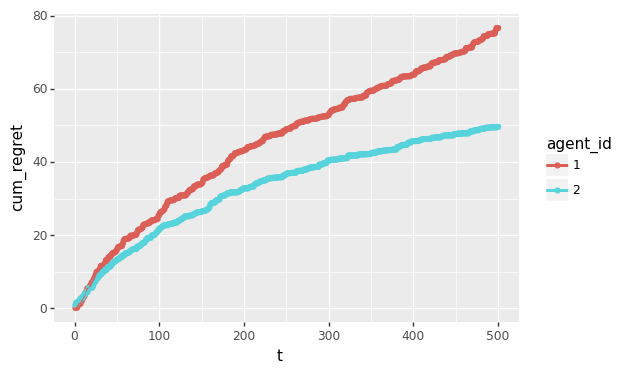

<ggplot: (8783566464269)>


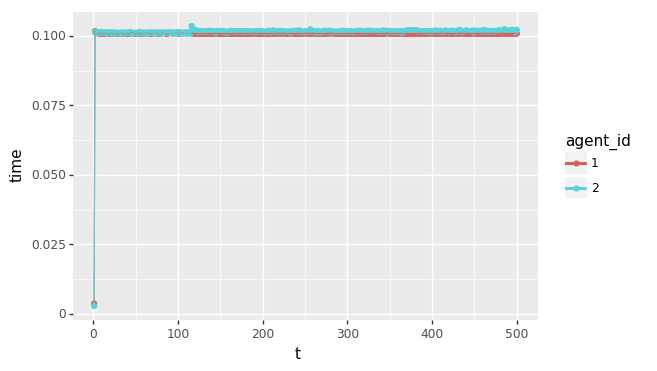

<ggplot: (8783674235317)>


In [7]:

hyperparameter_sweep(make_sagald_agent, list_prod([[0.2], [1,500]]), dim, var, 500, seed=1, verbosity=1)

theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521]
Experiment: Step 0
 Sample: array([-1.65072127, -0.89055558, -1.1191154 ,  1.9560789 , -0.3264995 ,
       -1.34267579,  1.11438298, -0.58652394, -1.23685338,  0.87583893,
        0.62336218, -0.43495668,  1.40754   ,  0.12910158,  1.6169496 ,
        0.50274088,  1.55880554,  0.1094027 , -1.2197444 ,  2.44936865])
 Steps taken: 0
 Sample: array([-0.54577417, -0.19883786, -0.7003985 , -0.20339445,  0.24266944,
        0.20183018,  0.66102029,  1.79215821, -0.12046457, -1.23312074,
       -1.18231813, -0.66575452, -1.67419581,  0.82502982, -0.49821356,
       -0.31098498, -0.00189148, -1.39662042, -0.86131636,  0.67471153])
 Steps taken: 0
Experiment: Step 1
 Sample: array([ 2.18240833,  0.86267878, -0.07548746, -1.5053385 ,  0.10030656,
   

 Sample: array([ 0.30199631,  1.58113864, -0.74773681, -0.12126034, -0.47488117,
        1.19814679,  0.59270235,  0.02486283, -0.63225338,  1.89745737,
       -1.11476568,  1.14119349,  1.3250148 , -0.12654946, -2.60427912,
       -1.40810099,  1.18880407, -1.03733996, -0.12376295, -1.0009134 ])
 Steps taken: 1102
Experiment: Step 13
 Sample: array([-1.14131785, -1.89133904,  2.65187425,  0.21542355,  0.44683638,
        1.41852204,  0.35298557, -0.91067252, -0.07779291,  2.20252548,
        0.50940886, -0.99330718,  0.67783763, -0.44438015, -1.03932625,
       -0.80516724,  1.80380019,  0.31908001,  1.13362652,  1.60387282])
 Steps taken: 1092
 Sample: array([-0.51919291, -1.77877243,  0.43476259, -0.13133561,  1.05367832,
        1.00557854,  1.08013377,  0.63831335, -1.50809502,  0.7467395 ,
        0.13547488, -0.12120708,  1.06617777, -0.13087032,  0.32859662,
       -0.3048121 ,  1.76340159,  1.1423499 ,  0.55261244,  0.27388097])
 Steps taken: 1046
Experiment: Step 14
 Sample: 

 Sample: array([ 0.83670096,  0.61939967, -0.00639985, -2.12630142,  0.70853894,
       -2.03854069, -0.76206325, -0.13307636, -0.53081742,  1.37430056,
       -0.68810205, -0.87216825,  0.10041705, -1.01778249,  1.07793525,
       -1.00011521,  1.68135681,  0.37242599, -0.77192835,  0.44327376])
 Steps taken: 935
Experiment: Step 26
 Sample: array([ 0.20974641,  0.56684673, -0.10743254, -2.99552645,  0.08965447,
       -0.58331233,  1.25044972,  0.26233196,  1.32422061,  1.09993312,
        0.54260177, -0.77438315, -1.22539425, -0.19947477, -1.14590187,
       -0.75043662,  1.08467371, -0.5250424 , -0.29056487, -0.60865712])
 Steps taken: 935
 Sample: array([ 0.45982998, -0.75402379,  0.68038616, -1.59007673,  2.22645494,
       -0.61244778,  0.79712418, -1.12084977,  1.62930848,  0.6633127 ,
        1.14253685, -0.67289268,  0.6774856 , -1.05772615, -0.07070645,
       -0.79233439,  1.19274503,  0.63603002,  0.81794506,  0.2492236 ])
 Steps taken: 931
Experiment: Step 27
 Sample: arr

 Sample: array([ 0.73007511,  0.17659526,  0.90971003, -0.50837278,  1.32354416,
        0.18845653, -0.19386266, -1.57740859,  0.33140074,  1.48200032,
        0.40214927, -0.95330063, -0.67587742,  0.66349307,  1.75065677,
       -3.09409945,  0.85324718,  1.81143291, -0.06074957, -0.31816541])
 Steps taken: 929
Experiment: Step 39
 Sample: array([-0.17763318,  0.14995096, -0.68966829, -0.27675018,  0.81701146,
       -1.94379687,  0.25927581, -0.2525123 ,  1.57600707,  0.26332766,
        1.79626912, -1.63494416,  0.8698733 , -0.17505907, -0.09095164,
       -0.74801571, -0.05885065,  0.39431743, -0.61926223, -0.66243494])
 Steps taken: 937
 Sample: array([ 0.36669124,  0.31186081,  0.25485816,  0.66554781,  1.88314536,
       -0.08785295, -0.874831  , -0.50750407, -0.16979956,  0.08144436,
        1.65340132, -2.72934985,  0.47186888,  1.63405868,  1.49841454,
       -1.82354893, -1.42607358,  1.77166098, -0.68770539, -1.72390532])
 Steps taken: 935
Experiment: Step 40
 Sample: arr

 Sample: array([ 0.65086788, -1.29721439,  0.32992454,  0.23081457,  1.17819984,
        0.21746482, -0.29832924, -0.03417735,  0.67015953,  0.72352091,
        0.20576139, -2.26350802, -0.93893489,  0.44684674, -0.73292155,
       -0.76396243,  0.10201923, -0.49341995,  0.53637194,  0.95000664])
 Steps taken: 922
Experiment: Step 52
 Sample: array([ 1.12461943, -0.17915236,  1.48236523,  0.23258907,  0.43319724,
       -1.63313786,  2.09469614, -1.20122681,  0.21458723, -0.61748469,
        0.29933079, -0.63768854,  0.35957811,  0.21965663,  0.67064322,
        1.02436886,  1.27477327, -1.06151364, -0.31077698,  0.1410017 ])
 Steps taken: 931
 Sample: array([ 0.70882735, -0.88910799,  0.86860633,  0.15692472,  1.32708732,
       -0.18543717,  0.51147987,  0.07418047, -1.02400777, -0.58063601,
        0.87118152, -0.10529235, -0.40901265, -1.98582098, -1.2749907 ,
       -1.29237772,  1.29326885,  0.83900497,  0.57862718, -0.71776911])
 Steps taken: 914
Experiment: Step 53
 Sample: arr

 Sample: array([ 2.07800885,  0.73814559,  1.29821707, -1.59538661,  1.6150023 ,
        0.00289683, -0.15582223,  0.35126991, -0.44817397,  0.89718165,
       -0.63836023, -2.47862343, -1.36002302,  0.13183898, -0.11883232,
       -1.07479483,  1.59677173,  0.69250365,  0.28974768,  1.3119448 ])
 Steps taken: 919
Experiment: Step 65
 Sample: array([-0.08391758, -0.84680437,  0.7045406 ,  0.07130289,  1.19989889,
       -2.23729339,  2.26704858, -0.83603734,  0.58387242, -0.69930687,
        1.30401291, -1.01440618, -0.50192082,  0.05708652,  0.94071112,
        1.02027232,  0.69235377,  1.02746011, -0.13561793,  0.03884637])
 Steps taken: 929
 Sample: array([ 1.69526846,  0.10525725,  0.12826804, -0.49347755,  0.23754534,
       -0.57695625,  0.46357367,  0.59048817,  0.04922131,  0.06728771,
        0.66134633, -1.0053822 , -0.11585404, -0.91866416, -0.53526865,
       -1.30938367,  1.30334582,  0.61013585,  0.46626067, -0.04323865])
 Steps taken: 934
Experiment: Step 66
 Sample: arr

 Sample: array([ 0.95291626,  0.83972547,  0.27622767,  0.17836176,  1.43123874,
       -1.3921343 ,  1.80059136,  0.07926232,  0.30606182, -0.7592494 ,
        1.33135924, -2.60360697,  0.16318459, -1.20591934, -0.13855732,
       -2.43819283,  1.09612787,  0.92746249,  1.81366351,  1.35052343])
 Steps taken: 927
Experiment: Step 78
 Sample: array([ 5.83310822e-01, -4.79172850e-01,  5.46082274e-01, -1.10730152e+00,
       -4.80264530e-04, -1.42793319e+00,  8.39457612e-01,  3.59349857e-01,
       -4.42787657e-01,  1.35170599e+00,  1.28476547e+00, -1.81217407e+00,
       -7.19180085e-01, -5.89889312e-01,  1.08452875e+00, -4.38884273e-01,
        1.24070019e+00,  4.85737517e-01, -5.76555295e-01,  1.01638763e+00])
 Steps taken: 931
 Sample: array([ 1.51495421, -0.21903403,  0.20714094,  0.25902492,  0.8811671 ,
       -1.99107627,  0.20290203,  0.36235911,  0.93745974,  0.54817163,
        0.31894546, -0.84229787, -0.43486446,  0.29225072,  0.67074622,
       -1.28723564,  1.11568478,  0.

 Sample: array([ 1.48924366e+00,  3.39868021e-01,  1.09379456e+00, -6.95596041e-01,
        2.25450656e+00, -1.93890217e-01,  1.50368666e+00, -6.61068838e-01,
        4.96923497e-01, -3.13226213e-01,  1.03833122e+00, -2.58366775e+00,
        1.13805453e-01, -6.91803868e-01,  5.93207278e-01, -1.47476664e+00,
        3.13494326e-01,  4.32832445e-01,  7.38653652e-01,  2.55730977e-03])
 Steps taken: 905
Experiment: Step 91
 Sample: array([-0.18651181, -0.47112699,  0.38990273,  0.68587398,  0.70534669,
       -1.83885261,  2.28192886, -0.4215475 , -0.05522656, -0.54214522,
        1.10168293, -1.99084744, -0.32711656, -0.43131451,  0.09523919,
       -0.72507404,  0.19619696, -0.16416056, -0.14994145,  0.88011684])
 Steps taken: 896
 Sample: array([ 1.1291596 , -0.0064744 ,  0.27085874, -0.30491911,  0.38482652,
       -0.59295403,  0.98829672,  0.08005084, -0.66433767,  0.33042069,
        0.31931873, -0.96761473, -0.71115752, -2.23687941, -0.01466448,
       -2.30938587,  0.52594134, -0.

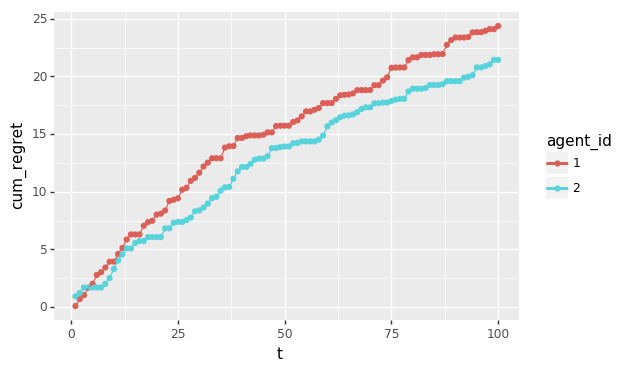

<ggplot: (8783673816101)>


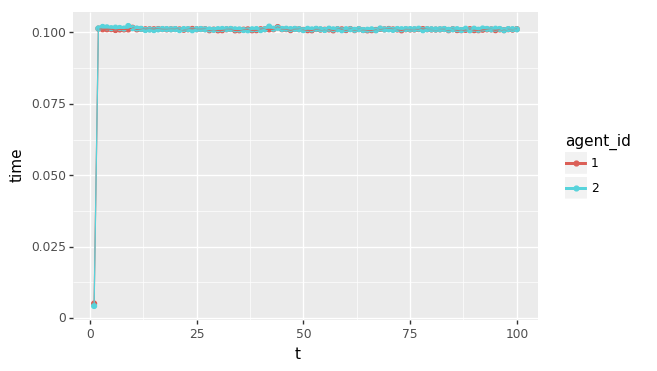

<ggplot: (8783673820725)>


([     action_id agent_id  cum_optimal  cum_regret  instant_regret    t  \
  0            1        1     0.999721    0.088187        0.088187    1   
  1            2        2     0.999721    0.927229        0.927229    1   
  2            3        1     1.875695    0.678247        0.590061    2   
  3            4        2     1.875695    1.215846        0.288617    2   
  4            5        1     2.860112    1.031540        0.353293    3   
  5            6        2     2.860112    1.694422        0.478576    3   
  6            7        1     3.843590    1.666463        0.634922    4   
  7            8        2     3.843590    1.694422        0.000000    4   
  8            9        1     4.801924    2.013052        0.346589    5   
  9           10        2     4.801924    1.694422        0.000000    5   
  10          11        1     5.632042    2.780432        0.767380    6   
  11          12        2     5.632042    1.694422        0.000000    6   
  12          13        1

In [9]:
make_prec_sagald_agent = lambda hypers: SAGATS(num_articles, dim, [0]*dim, cov=None, 
                                          step_size=lambda t: hypers[0],
                                          batch_size = hypers[1],
                                          time=time_limit,
                                          n_steps=9999,
                                          precondition='proper',
                                          init_pt=None, verbosity=verbosity)

n_steps=100
simple_compare([make_sagald_agent([0.02, 16]), make_prec_sagald_agent([0.02,16])], num_articles, dim, var, n_steps, seed=1, verbosity=1)